In [5]:
import pickle
import re
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import transformers

from MHP import MHP

Sandbox analysis for MAP EM Hawkes

In [ ]:
# load data
# load model
# viz params
# run over a story and viz P
# generate seq's

In [3]:
with open('../data/data_ts/data_mhp.pkl', 'rb') as f:
    data = pickle.load(f)

with open('../data/data_ts/token_dicts_mhp.pkl', 'rb') as f:
    token_dicts = pickle.load(f)

In [4]:
tokenizer = transformers.AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

In [6]:
with open('mhp_params.pkl', 'rb') as f:
    params = pickle.load(f)
params.keys()

dict_keys(['tmx', 'smx', 'alpha', 'mu', 'omega'])

In [7]:
mhp = MHP(alpha=params['alpha'], mu=params['mu'], omega=params['omega'])

Max eigenvalue: 0.20540
Appears stable


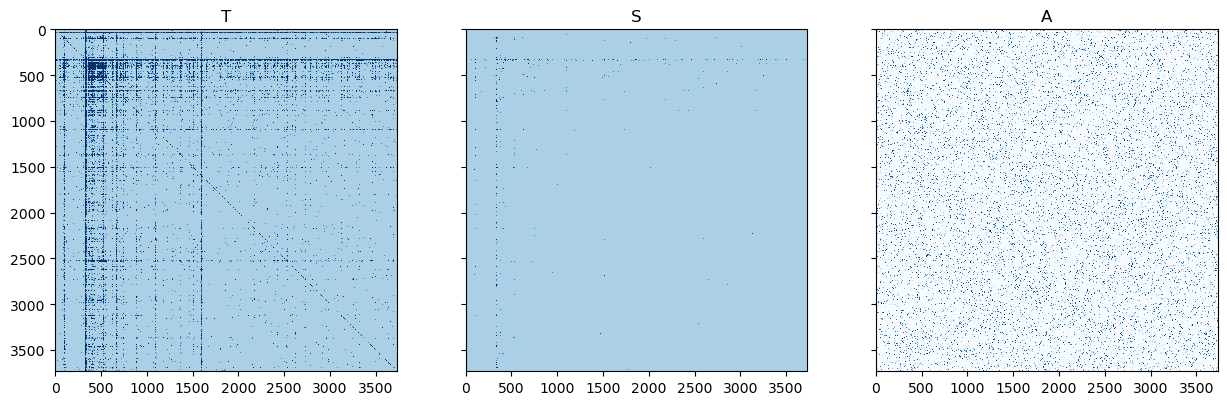

In [15]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

titles = {'tmx': 'T', 'smx': 'S', 'alpha': 'A'}

for i, mx in enumerate(['tmx', 'smx', 'alpha']):
    m = 0.001 if mx=='alpha' else 3
    axs[i].imshow(params[mx], cmap='Blues', 
                  vmin=0, vmax=m, interpolation='none')
    axs[i].set_title(titles[mx])

plt.show()

In [25]:
seq = np.array(data['train'][0])
seq.shape

(164, 2)

In [26]:
_, _, pii, pij = mhp.EM(seq=seq, return_p=True)

Reached max iter 100 (LL: -4.878701970227944) ... 11.015


In [34]:
tokens = [tokenizer.decode([token_dicts['token_reverse_dict'][t]]) 
          for t in seq[:10,1]]
tokens

['[CLS]', 'One', 'day', ',', 'a', 'little', 'girl', 'named', 'Lily', 'found']

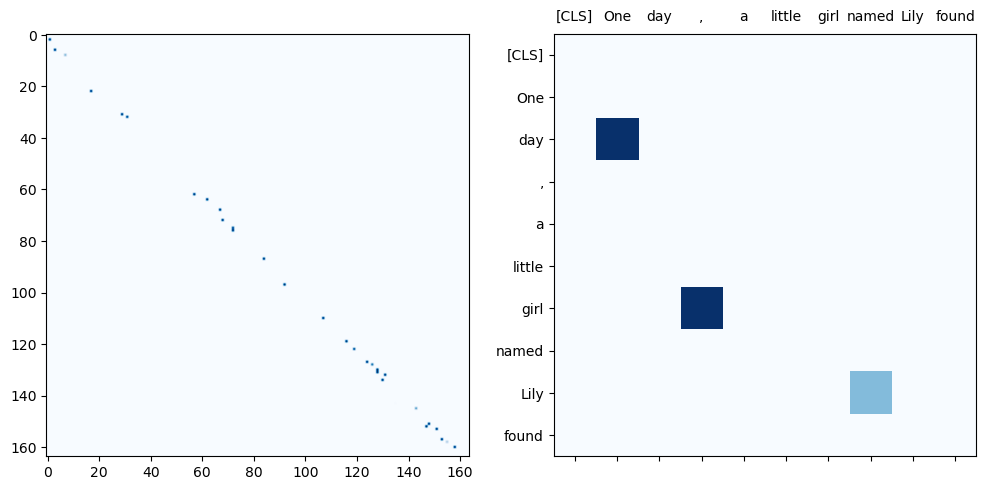

In [40]:
fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].imshow(pij, cmap='Blues', vmin=0, vmax=1)
axs[1].imshow(pij[:10,:10], cmap='Blues', vmin=0, vmax=1)

axs[1].set_yticks(range(10))
axs[1].set_xticks(range(10))
axs[1].set_yticklabels(tokens)
axs[1].set_xticklabels(tokens)
axs[1].xaxis.set_tick_params(labeltop=True, labelbottom=False)

In [43]:
gseq = mhp.generate_seq(0.05)
words = tokenizer.decode([token_dicts['token_reverse_dict'][t[1]] for t in gseq])
print(words)

blockedmiring saved mom bees penill gate grabbed rides lift offer ya wheelew infant microwave rug happily tomato imagination purchaseems horizonuz takerot land somehow flu mini surprising $ charming chair ringing behindsh pourberriesvious comet sandwich resist junk targets hunt Anyone mon
